<a href="https://colab.research.google.com/github/Madhavi-Sawarkar/MLProject1/blob/master/MLPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Picture](https://techcrunch.com/wp-content/uploads/2020/07/P90389007_highRes.jpg?w=730&crop=1)

***Exploratory_Data_Analysis Of Car Features***

In [122]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**1.Data Exploration and Preprocessing**

What is the first thing we do when we are provided with a dataset? we would explore the data, go through the individual variables, and clean the data to make it ready for the model building process.

That is exactly what we will be doing here. We will explore the variables and find out the mandatory preprocessing steps required for the given data.

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) 



In [123]:
#Important libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


1(a) Loading Data Into Data Frame

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.



In [124]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv")
# Print the dataframe
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [125]:
#To display the top 5 rows
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [126]:
#To display the bottom 5 rows
data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


1(b)Checking The Types Of Data & Basic Summary Stats.

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

**data.info()** is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data.

**data.describe()** is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [127]:
#Checking the types of data
data.dtypes
#To Print The Full Summary
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**2.Dropping Irrevelant Columns**

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Number of doors, Market Category doesn't make any sense to me so I just dropped for this instance.







In [128]:
# Dropping irrelevant columns
data = data.drop(['Engine Fuel Type', 'Number of Doors', 'Market Category'], axis=1)
data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**3.Renaming The Columns**

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [129]:
# Renaming the column names
data = data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**4.Dropping The Duplicate Rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 11914 data meaning that I had 792 of duplicate data.

Pandas .size, .shape and .ndim are used to return size, shape and dimensions of data frames and series.

In [130]:
# Total number of rows and columns
data.shape
#data.size
#data.ndim

(11914, 13)

In [131]:
# Rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number Of Duplicate Rows :",duplicate_rows_data.shape)

Number Of Duplicate Rows : (792, 13)


Now let us remove the duplicate data because it's ok to remove them.

In [132]:
# Used to count the number of rows before removing the data
data.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

So seen above there are 11914 rows and we are removing 792 rows of duplicate data

In [133]:
# Dropping the duplicates 
data = data.drop_duplicates()
data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [134]:
data.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

In [135]:
data.shape

(11122, 13)

**4(a).Dropping Missing Null Values**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.


In [136]:
#Finding the null values.
print(data.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


This is the reason in the above step while counting both **Horsepower(HP)**and **Cylinders** had 11053 and 11092 over 11122 rows


In [137]:
# Dropping the missing values.
data = data.dropna()
data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [138]:
# After dropping the values
print(data.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


**5.Detecting Outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

**1.Box plot of HP**

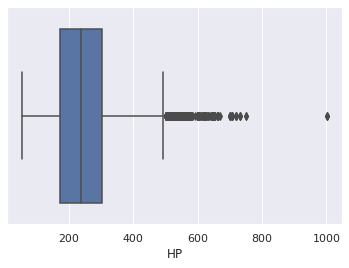

In [140]:
sns.boxplot(x=data['HP'])

**2.Box plot of Price**

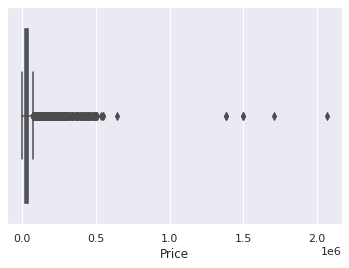

In [141]:
sns.boxplot(x=data['Price'])

**3.Box plot of Cylinders**

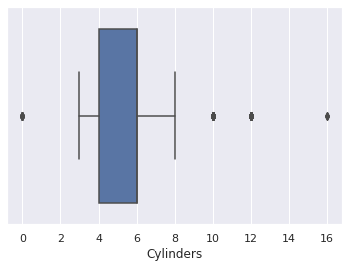

In [142]:
sns.boxplot(x=data['Cylinders'])

In [143]:
P1 = data.quantile(0.25)
P3 = data.quantile(0.75)
IQR = P3 - P1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [144]:
data = data[~((data < (P1 - 1.5 * IQR)) |(data > (P3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8546, 13)

You cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.

**6.What are most represented car brand?**

 **Histogram**

 Plot different features against one another (scatter), against frequency (histogram)
refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

Text(0.5, 0, 'Make')

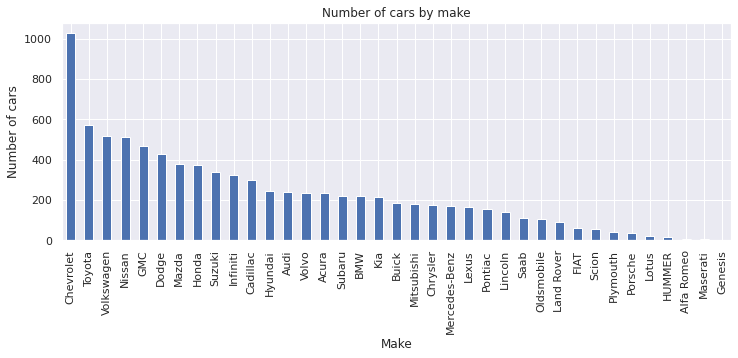

In [145]:
#percentage of car per brand
#counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())
#Top 10 Car Brands
#popular_labels = counts.index[:10]
#Plot
#plt.figure(figsize=(10,5))
#plt.barh(popular_labels, width=counts[:10])
#plt.title('Top 10 Car Brands')
#plt.show()
# Plotting a Histogram
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(12,4))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')


In [146]:
prices = data[['Make','Price']].loc[(data['Make']=="Chevrolet")|
                                    (data['Make']=="Ford")|
                                    (data['Make']=="Volswagen")|
                                    (data['Make']=="Toyota")|
                                    (data['Make']=="Dodge")|
                                    (data['Make']=="Nissan")|
                                    (data['Make']=="GMC")|
                                    (data['Make']=="Honda")|
                                    (data['Make']=="Mazda")].groupby('Make').mean()
print(prices)

                  Price
Make                   
Chevrolet  28142.855891
Dodge      26076.722353
GMC        33261.400853
Honda      27381.364611
Mazda      20495.820106
Nissan     28352.543860
Toyota     27769.421793


**7.Correlation Matrix**

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

In [147]:
data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


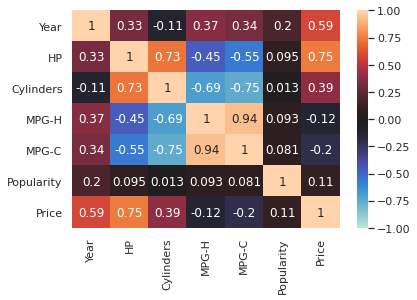

In [150]:
matrix = np.tril(data.corr())
#sns.heatmap(data.corr(), annot=True, mask=matrix)
#sns.heatmap(data.corr(), annot = True, fmt='.1g')
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

7(b).Scatterplot

We generally use scatter plots to find the correlation between two variables.
Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.


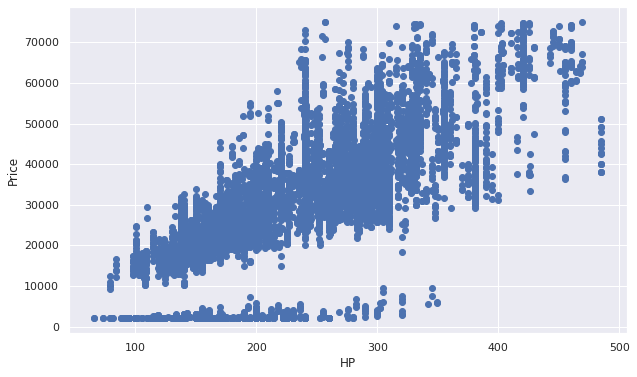

In [151]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

7(c).Which Vehicle Style Segment Of Cars Sold The Most?

Text(0.5, 0, 'Body Type')

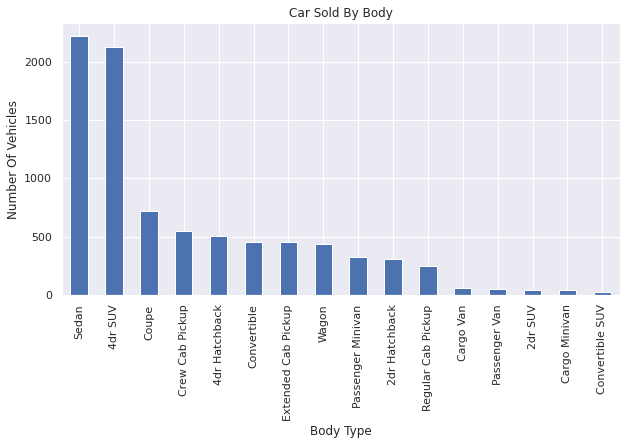

In [152]:
data['Vehicle Style'].value_counts().plot.bar(figsize=(10,5))
plt.title('Car Sold By Body')
plt.ylabel('Number Of Vehicles')
plt.xlabel('Body Type')

**8."Price-group"**

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [153]:
data['price_group']=pd.cut(data['Price'], 6,
                            labels=np.arange(1,7), include_lowest=True)
data['price_group'] = data['price_group'].astype(object)

Text(0.5, 0, 'Price Group')

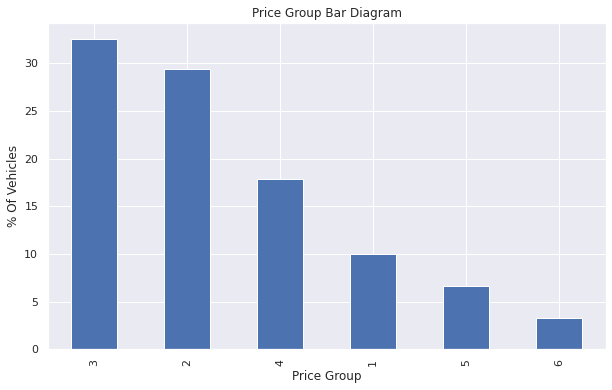

In [154]:
(data['price_group'].value_counts() / len(data) *100).plot.bar(figsize=(10,6))
plt.title('Price Group Bar Diagram')
plt.ylabel('% Of Vehicles')
plt.xlabel('Price Group')

**9.Model Building**

**Preparing the data for training the model**

We concatenate the **Popularity, Year, HP, Cylinders, MPG-H & MPG-C** columns using np.c_ provided by the numpy library.

In [157]:
X = pd.DataFrame(np.c_[data['Popularity'], data['Year'], data['HP'], data['Cylinders'], data['MPG-H'], data['MPG-C']], columns = ['Popularity','Year','HP','Cylinders','MPG-H','MPG-C'])
Y = data['Price'].values

**Scale The Data**

Based on the type of model we are building, we will have to normalize the data in such a way that the range of all the variables is almost similar. We can do this easily in python using the StandardScaler function.

In [158]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler() 
#sc_Y = StandardScaler()
#X = sc_X.fit_transform(X)
#Y = sc_Y.fit_transform(Y.reshape(-1,1))

**Splitting the data into training and testing sets**

we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data.To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6836, 6)
(1710, 6)
(6836,)
(1710,)


**Training And Testing Model**

We use scikit-learn’s LinearRegression, RandomForestRegressor, PolynomialFeatures and SVR to train our model on both the training and test sets.

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import  RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

**Model evaluation**

We will evaluate our model using MSA, RMSE and R2-score.

**linear regression**

The model performance for training set:-
MAE on train data: 80.04964521134002
RMSE on train data:  8344.540523332164
R2 score on train data : 0.8356832491876865
-------------------------------------------------------
The model performance for testing set:-
MAE on test data: 80.28451313108668
RMSE on test data:  8446.82878430551
R2 score on test  : 0.8246499585376298


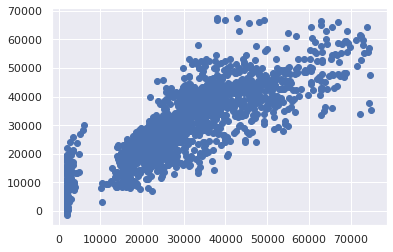

In [168]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(X_train, Y_train)

# predict the target on train and test data 
predict_train = model_LR.predict(X_train)

predict_test  = model_LR.predict(X_test)
plt.scatter(Y_test,predict_test)

print("The model performance for training set:-")
print('MAE on train data:', mean_absolute_error(Y_train, predict_train)**(0.5))
print('RMSE on train data: ', mean_squared_error(Y_train, predict_train)**(0.5))
print('R2 score on train data :', r2_score(Y_train, predict_train)**(0.5))
print("-------------------------------------------------------")
print("The model performance for testing set:-")
print('MAE on test data:', mean_absolute_error(Y_test, predict_test)**(0.5))
print('RMSE on test data: ',  mean_squared_error(Y_test, predict_test)**(0.5))
print('R2 score on test  :', r2_score(Y_test, predict_test)**(0.5))


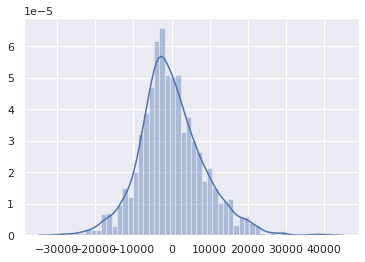

In [169]:
sns.distplot((Y_test-predict_test),bins=50)

The linear regression model has a very low values on both training and validation data. 

**10.Spot Checking Algorithm**

**A)RandomForestRegression**

Let us see what tree-based model performs  in this case. Here we will train a random forest and check if we get any improvement in the train and validation errors.

The model performance for training set:-
MAE on train data: 93.16101560394078
RMSE on train data:  11384.506312568517
R2 score on train data : 0.6622388413543011
-------------------------------------------------------
The model performance for testing set:-
MAE on test data: 92.41216959524262
RMSE on test data:  11400.887925319701
R2 score on test data: 0.645852174696959


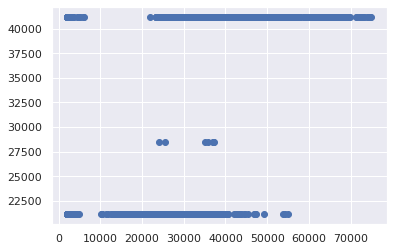

In [170]:
#create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=1)

# fit the model with the training data
model_RFR.fit(X_train, Y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)
plt.scatter(Y_test,predict_test)

print("The model performance for training set:-")
print('MAE on train data:', mean_absolute_error(Y_train, predict_train)**(0.5))
print('RMSE on train data: ', mean_squared_error(Y_train, predict_train)**(0.5))
print('R2 score on train data :', r2_score(Y_train, predict_train)**(0.5))
print("-------------------------------------------------------")
print("The model performance for testing set:-")
print('MAE on test data:', mean_absolute_error(Y_test, predict_test)**(0.5))
print('RMSE on test data: ',  mean_squared_error(Y_test, predict_test)**(0.5))
print('R2 score on test data:', r2_score(Y_test, predict_test)**(0.5))

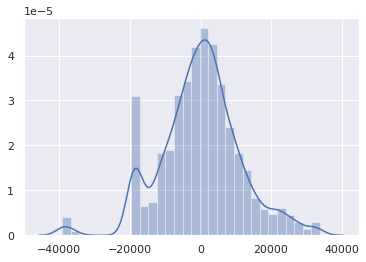

In [171]:
sns.distplot((Y_test-predict_test),bins=30)

**B)PolynomialFeatures**

Here we will train a polynomial features and check if we get any improvement in the train and validation errors.

The model performance for training set:-
MAE on train data: 80.04964521133998
RMSE on train data:  8344.540523332176
R2 score on train data : 0.835683249187686
-------------------------------------------------------
The model performance for testing set:-
MAE on test data: 80.28451313108661
RMSE on test data:  8446.828784305513
R2 score on test data: 0.8246499585376297


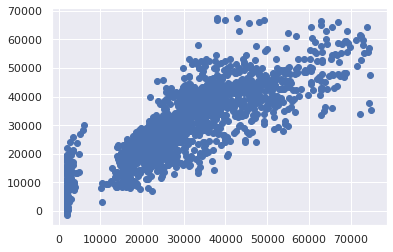

In [172]:
#create an object of the PolynomialFeatures
model_PF = PolynomialFeatures(degree = 1)

# fit the model with the training data
X_poly = model_PF.fit_transform(X_train)
model_PF.fit(X_train, Y_train) 
model_LR = LinearRegression()
model_LR.fit(X_poly, Y_train)

# predict the target on train and test data
predict_train = model_LR.predict(model_PF.fit_transform(X_train))
predict_test = model_LR.predict(model_PF.fit_transform(X_test))
plt.scatter(Y_test,predict_test)

print("The model performance for training set:-")
print('MAE on train data:', mean_absolute_error(Y_train, predict_train)**(0.5))
print('RMSE on train data: ', mean_squared_error(Y_train, predict_train)**(0.5))
print('R2 score on train data :', r2_score(Y_train, predict_train)**(0.5))
print("-------------------------------------------------------")
print("The model performance for testing set:-")
print('MAE on test data:', mean_absolute_error(Y_test, predict_test)**(0.5))
print('RMSE on test data: ',  mean_squared_error(Y_test, predict_test)**(0.5))
print('R2 score on test data:', r2_score(Y_test, predict_test)**(0.5))


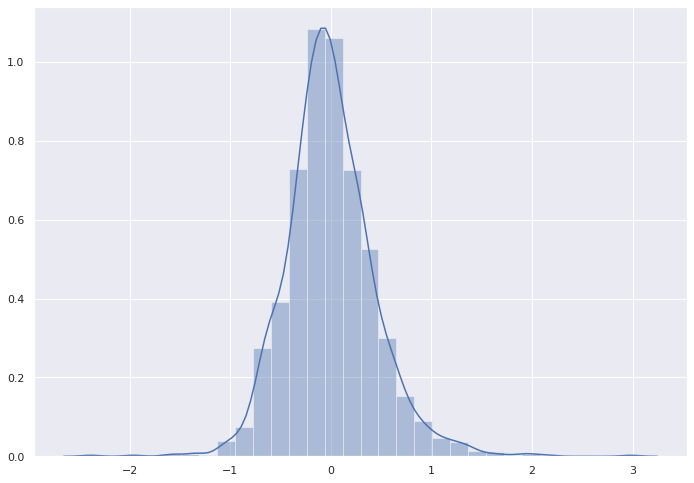

In [ ]:
sns.distplot((Y_test-predict_test),bins=30)

**C)SVR**

Here we will train a svr and check if we get any improvement in the train and validation errors.

The model performance for training set:-
MAE on train data: 108.25297802005186
RMSE on train data:  15207.687695835053
R2 score on train data : nan
-------------------------------------------------------
The model performance for testing set:-
MAE on test data: 107.06524169340716
RMSE on test data:  14957.225419442844
R2 score on test data: nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


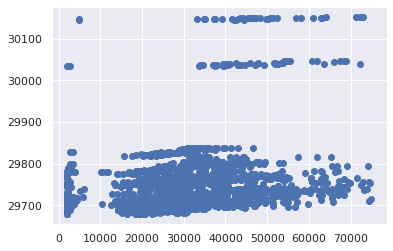

In [173]:
#create an object of the SVR
model_SVR = SVR(kernel = 'rbf')

# fit the model with the training data
model_SVR.fit(X_train, Y_train) 
model_LR = LinearRegression()
model_LR.fit(X_poly, Y_train)

# predict the target on train and test data
predict_train = model_SVR.predict(X_train)
predict_test = model_SVR.predict(X_test)
plt.scatter(Y_test,predict_test)

print("The model performance for training set:-")
print('MAE on train data:', mean_absolute_error(Y_train, predict_train)**(0.5))
print('RMSE on train data: ', mean_squared_error(Y_train, predict_train)**(0.5))
print('R2 score on train data :', r2_score(Y_train, predict_train)**(0.5))
print("-------------------------------------------------------")
print("The model performance for testing set:-")
print('MAE on test data:', mean_absolute_error(Y_test, predict_test)**(0.5))
print('RMSE on test data: ',  mean_squared_error(Y_test, predict_test)**(0.5))
print('R2 score on test data:', r2_score(Y_test, predict_test)**(0.5))

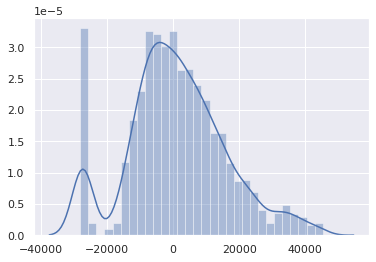

In [174]:
sns.distplot((Y_test-predict_test),bins=30)

**Thank you!!**